# Simple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

## 1. Read the dataset

In [3]:
df = pd.read_csv('data/height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


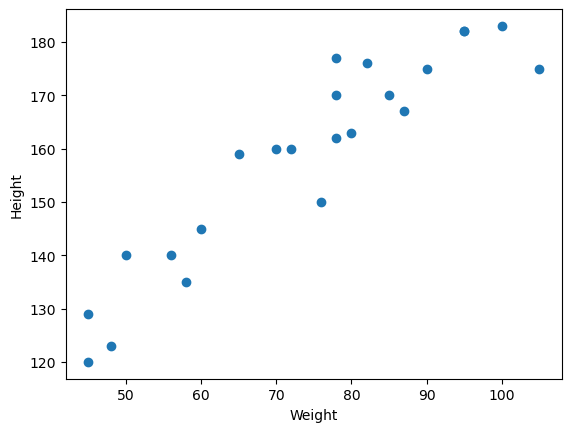

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

## 2. EDA, FE

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [9]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


## 3. Divide our dataset into dependent and independent feature

In [ ]:
X=df[['Weight']] ## independent - using 2d because it is required
y=df['Height'] ## gives a vector kind of output which is 1 d

In [20]:
X.shape  , y.shape 

((23, 1), (23,))

## 4. Further divide the dataset into train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape , X_test.shape 

((18, 1), (5, 1))

In [24]:
y_test.shape , y_train.shape 

((5,), (18,))

## 5. Standard Scaling

if value is small time taken to compute is less so we apply standard scaling on train and test data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [28]:
X_train= scaler.fit_transform(X_train)

on test data we perform transform not fit transform 
fit = calculates mean and std for z score formula
tranform = apply the zscore formula on all data

In [29]:
X_test=scaler.transform(X_test)

we dont perform fit transform on y variable because it is our output variable

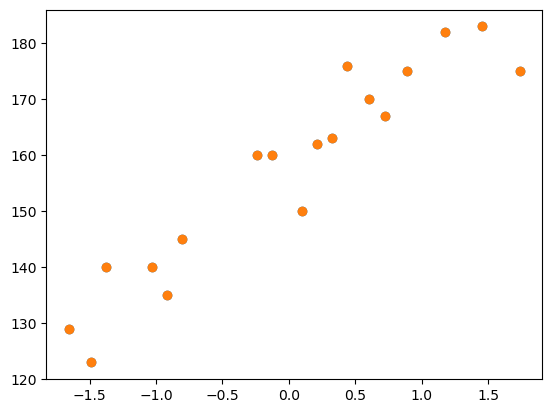

In [31]:
plt.scatter(X_train,y_train)
plt.show()

## 6. Model Training

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
regression = LinearRegression()

In [35]:
## Training the train data

regression.fit(X_train,y_train)

LinearRegression()

In [36]:
regression.intercept_

157.5

In [37]:
regression.coef_

array([17.03440872])

coef_ :- slope values based on number of input features

for 1 feature 1 slope 

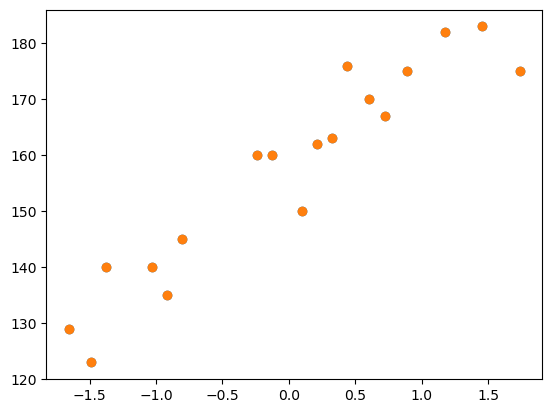

In [39]:
plt.scatter(X_train,y_train)
plt.show()

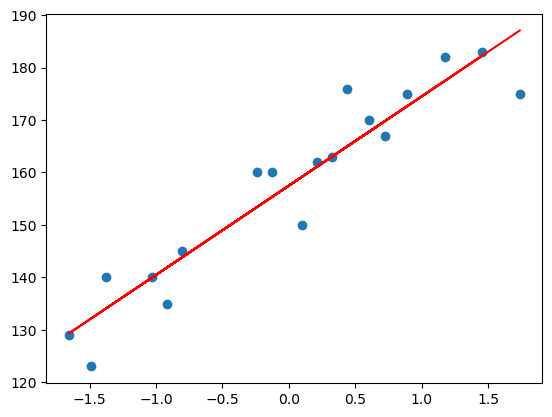

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')
plt.show()

regression.predict(X_train) ;- will give y hat ( Predicted values)

### Predicition of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)


## prediction of test data 
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)


In [44]:
## predicition for test data

y_pred= regression.predict(X_test)

In [45]:
y_pred

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [47]:
y_test 

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrices MAE , MSE , RMSE 

In [48]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [49]:
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

109.77592599051654 9.822657814519227 10.477400726827076


####  accuracy of the model R squared and adjusted r squared
### Formula of R square

**R^2 = 1- SSR/SST**

R^2 = Accuracy of the model

SSR = sum of squares of residuals

SST = total sum of squares


In [51]:
## accuracy of the model R squared and adjusted r squared

from sklearn.metrics import r2_score

In [52]:
score = r2_score(y_test,y_pred)

In [53]:
score 

0.7769869860423441

## Adjusted R2 = 1 -[(1-R2)*(n-1)/(n-k-1)]**

where 

1. R2 = The R2 of the model
2. n = number of observations
3. k = the number of predictor variables

In [54]:
# display adjusted r-squared

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254